# Elon Musk tweets

In [8]:
!python -m spacy download en_core_web_md

2021-09-06 19:04:26.120839: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'cudart64_110.dll'; dlerror: cudart64_110.dll not found
2021-09-06 19:04:26.121669: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


[+] Download and installation successful
You can now load the package via spacy.load('en_core_web_md')


In [126]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import string # special operations on strings
import spacy # language models

from matplotlib.pyplot import imread
from matplotlib import pyplot as plt
from wordcloud import WordCloud
%matplotlib inline

In [127]:
musk = pd.read_csv('C:/Users/DELL 5459/Downloads/excelr/Assignment/11 Text Mining/Elon_musk.csv', encoding='ISO-8859-1',error_bad_lines=False)
musk

,No,Text
0,1,@kunalb11 Im an alien
1,2,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,3,@joerogan @Spotify Great interview!
3,4,@gtera27 Doge is underestimated
4,5,@teslacn Congratulations Tesla China for amazi...
...,...,...
1994,1995,"@flcnhvy True, it sounds so surreal, but the n..."
1995,1996,@PPathole Make sure to read ur terms &amp; con...
1996,1997,@TeslaGong @PPathole Samwise Gamgee
1997,1998,@PPathole Altho Dumb and Dumber is <U+0001F525...


# Cleaning the data

In [128]:
# Create a function to clean the tweets

def cleanText(text):
    text= re.sub(r'@[A-Za-z0-9]+','', text)  # Remove @
    text= re.sub(r'#','',text)  # Remove #
    text= re.sub(r'RT[\s]+','',text)  # Remove RT
    text= re.sub(r'https?:\/\/\/S+','',text) # remove hyper link
    text= re.sub(r"[0-9" "]+"," ",text)
    text= re.sub(r'[^a-zA-Z\s]', '',text) #remove special characters/emojis
    text= re.sub(r"[0-9""]+"," " , text)
    return text

In [129]:
# Clean text
musk['Text']= musk['Text'].apply(cleanText)

In [130]:
musk.head()

,No,Text
0,1,Im an alien
1,2,AACarmack Ray tracing on Cyberpunk with HDR is...
2,3,Great interview
3,4,Doge is underestimated
4,5,Congratulations Tesla China for amazing execu...


In [131]:
musk = [Text.strip() for Text in musk.Text] # remove both the leading and the trailing characters
musk = [Text for Text in musk if Text] # removes empty strings, because they are considerd in python as False
musk[0:10]

['Im an alien',
 'AACarmack Ray tracing on Cyberpunk with HDR is nextlevel Have you tried it',
 'Great interview',
 'Doge is underestimated',
 'Congratulations Tesla China for amazing execution last year Now on to the next for even more',
 'Happy New Year of the Ox httpstco WFKMYu oj',
 'Frodo was the underdoge\nAll thought he would fail\nHimself most of all httpstcozGxJFDzzrM',
 'Haha thanks',
 'Indeed Tweets definitely do not represent realworld time allocation',
 'The most entertaining outcome is the most likely']

In [132]:
# Joining the list into one string/text
text = ''.join(musk)
text

'Im an alienAACarmack Ray tracing on Cyberpunk with HDR is nextlevel Have you tried itGreat interviewDoge is underestimatedCongratulations Tesla China for amazing execution last year Now on to the next for even moreHappy New Year of the Ox httpstco WFKMYu ojFrodo was the underdoge\nAll thought he would fail\nHimself most of all httpstcozGxJFDzzrMHaha thanksIndeed Tweets definitely do not represent realworld time allocationThe most entertaining outcome is the most likelyJust sent someJust agree to do Clubhouse withhttpstco rWE uHSTSIts getting realBought some Dogecoin for lil X so he can be a toddler hodlerHe definitely has issues but the sentencing seems a bit highThanks for fixingPlease unlock my accountU F U FThis is true power haha httpstcoFc uhQSd OAny crypto wallet that wont give you your private keys should be avoided at all costsYour app sucksNASA has selected Falcon Heavy to launch the first two elements of the lunar Gateway together on one mission httpstco pWtYesOnce we can pr

In [133]:
# Punctuation removing
no_punc_text = text.translate(str.maketrans('','', string.punctuation))  
no_punc_text

'Im an alienAACarmack Ray tracing on Cyberpunk with HDR is nextlevel Have you tried itGreat interviewDoge is underestimatedCongratulations Tesla China for amazing execution last year Now on to the next for even moreHappy New Year of the Ox httpstco WFKMYu ojFrodo was the underdoge\nAll thought he would fail\nHimself most of all httpstcozGxJFDzzrMHaha thanksIndeed Tweets definitely do not represent realworld time allocationThe most entertaining outcome is the most likelyJust sent someJust agree to do Clubhouse withhttpstco rWE uHSTSIts getting realBought some Dogecoin for lil X so he can be a toddler hodlerHe definitely has issues but the sentencing seems a bit highThanks for fixingPlease unlock my accountU F U FThis is true power haha httpstcoFc uhQSd OAny crypto wallet that wont give you your private keys should be avoided at all costsYour app sucksNASA has selected Falcon Heavy to launch the first two elements of the lunar Gateway together on one mission httpstco pWtYesOnce we can pr

In [134]:
# Tokenization 
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize

text_tokens = word_tokenize(no_punc_text)
print(text_tokens)

[nltk_data] Downloading package punkt to C:\Users\DELL
[nltk_data]     5459\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


['Im', 'an', 'alienAACarmack', 'Ray', 'tracing', 'on', 'Cyberpunk', 'with', 'HDR', 'is', 'nextlevel', 'Have', 'you', 'tried', 'itGreat', 'interviewDoge', 'is', 'underestimatedCongratulations', 'Tesla', 'China', 'for', 'amazing', 'execution', 'last', 'year', 'Now', 'on', 'to', 'the', 'next', 'for', 'even', 'moreHappy', 'New', 'Year', 'of', 'the', 'Ox', 'httpstco', 'WFKMYu', 'ojFrodo', 'was', 'the', 'underdoge', 'All', 'thought', 'he', 'would', 'fail', 'Himself', 'most', 'of', 'all', 'httpstcozGxJFDzzrMHaha', 'thanksIndeed', 'Tweets', 'definitely', 'do', 'not', 'represent', 'realworld', 'time', 'allocationThe', 'most', 'entertaining', 'outcome', 'is', 'the', 'most', 'likelyJust', 'sent', 'someJust', 'agree', 'to', 'do', 'Clubhouse', 'withhttpstco', 'rWE', 'uHSTSIts', 'getting', 'realBought', 'some', 'Dogecoin', 'for', 'lil', 'X', 'so', 'he', 'can', 'be', 'a', 'toddler', 'hodlerHe', 'definitely', 'has', 'issues', 'but', 'the', 'sentencing', 'seems', 'a', 'bit', 'highThanks', 'for', 'fixin

In [135]:
len(text_tokens)

17083

In [136]:
# Remove stopwords
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

my_stop_words = stopwords.words('english')
my_stop_words.append('the')
no_stop_tokens = [word for word in text_tokens if not word in my_stop_words]
no_stop_tokens

[nltk_data] Downloading package stopwords to C:\Users\DELL
[nltk_data]     5459\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['Im',
 'alienAACarmack',
 'Ray',
 'tracing',
 'Cyberpunk',
 'HDR',
 'nextlevel',
 'Have',
 'tried',
 'itGreat',
 'interviewDoge',
 'underestimatedCongratulations',
 'Tesla',
 'China',
 'amazing',
 'execution',
 'last',
 'year',
 'Now',
 'next',
 'even',
 'moreHappy',
 'New',
 'Year',
 'Ox',
 'httpstco',
 'WFKMYu',
 'ojFrodo',
 'underdoge',
 'All',
 'thought',
 'would',
 'fail',
 'Himself',
 'httpstcozGxJFDzzrMHaha',
 'thanksIndeed',
 'Tweets',
 'definitely',
 'represent',
 'realworld',
 'time',
 'allocationThe',
 'entertaining',
 'outcome',
 'likelyJust',
 'sent',
 'someJust',
 'agree',
 'Clubhouse',
 'withhttpstco',
 'rWE',
 'uHSTSIts',
 'getting',
 'realBought',
 'Dogecoin',
 'lil',
 'X',
 'toddler',
 'hodlerHe',
 'definitely',
 'issues',
 'sentencing',
 'seems',
 'bit',
 'highThanks',
 'fixingPlease',
 'unlock',
 'accountU',
 'F',
 'U',
 'FThis',
 'true',
 'power',
 'haha',
 'httpstcoFc',
 'uhQSd',
 'OAny',
 'crypto',
 'wallet',
 'wont',
 'give',
 'private',
 'keys',
 'avoided',
 '

In [137]:
len(no_stop_tokens)

11777

In [138]:
# Normalizing the data
lower_words = [x.lower() for x in no_stop_tokens]  # Converting all tokens to lower case words
print(lower_words[0:25])

['im', 'alienaacarmack', 'ray', 'tracing', 'cyberpunk', 'hdr', 'nextlevel', 'have', 'tried', 'itgreat', 'interviewdoge', 'underestimatedcongratulations', 'tesla', 'china', 'amazing', 'execution', 'last', 'year', 'now', 'next', 'even', 'morehappy', 'new', 'year', 'ox']


In [139]:
len(lower_words)

11777

In [140]:
# Stemming
from nltk.stem import PorterStemmer
ps = PorterStemmer()
stemmed_tokens = [ps.stem(word) for word in lower_words]   # converting all the tokens into simpler form of words.
print(stemmed_tokens[0:40])

['im', 'alienaacarmack', 'ray', 'trace', 'cyberpunk', 'hdr', 'nextlevel', 'have', 'tri', 'itgreat', 'interviewdog', 'underestimatedcongratul', 'tesla', 'china', 'amaz', 'execut', 'last', 'year', 'now', 'next', 'even', 'morehappi', 'new', 'year', 'ox', 'httpstco', 'wfkmyu', 'ojfrodo', 'underdog', 'all', 'thought', 'would', 'fail', 'himself', 'httpstcozgxjfdzzrmhaha', 'thanksinde', 'tweet', 'definit', 'repres', 'realworld']


In [141]:
nlp = spacy.load('en_core_web_sm')

In [142]:
# Lemmas being one of them, but mostly POS, which will follow later

doc = nlp(' '. join(no_stop_tokens))  # lemmatization gives better result than stemming.
print(doc[0:40])

Im alienAACarmack Ray tracing Cyberpunk HDR nextlevel Have tried itGreat interviewDoge underestimatedCongratulations Tesla China amazing execution last year Now next even moreHappy New Year Ox httpstco WFKMYu ojFrodo underdoge All thought would fail Himself httpstcozGxJFDzzrMHaha thanksIndeed Tweets definitely represent


In [143]:
lemmas = [tokens.lemma_ for tokens in doc]  
print(lemmas[0:40])

['I', 'm', 'alienaacarmack', 'Ray', 'trace', 'Cyberpunk', 'HDR', 'nextlevel', 'have', 'try', 'itgreat', 'interviewDoge', 'underestimatedcongratulation', 'Tesla', 'China', 'amazing', 'execution', 'last', 'year', 'now', 'next', 'even', 'morehappy', 'New', 'Year', 'Ox', 'httpstco', 'WFKMYu', 'ojfrodo', 'underdoge', 'all', 'thought', 'would', 'fail', 'himself', 'httpstcozgxjfdzzrmhaha', 'thanksindeed', 'tweet', 'definitely', 'represent']


In [144]:
len(lemmas)

11899

# Feature Extraction

In [145]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()
X = vectorizer.fit_transform(lemmas)

In [146]:
print(vectorizer.vocabulary_)

{'alienaacarmack': 119, 'ray': 3683, 'trace': 4614, 'cyberpunk': 843, 'hdr': 1774, 'nextlevel': 3093, 'have': 1769, 'try': 4662, 'itgreat': 2523, 'interviewdoge': 2488, 'underestimatedcongratulation': 4731, 'tesla': 4449, 'china': 615, 'amazing': 147, 'execution': 1256, 'last': 2647, 'year': 5077, 'now': 3139, 'next': 3092, 'even': 1217, 'morehappy': 2998, 'new': 3090, 'ox': 3307, 'httpstco': 1880, 'wfkmyu': 4943, 'ojfrodo': 3211, 'underdoge': 4730, 'all': 122, 'thought': 4515, 'would': 5021, 'fail': 1298, 'himself': 1826, 'httpstcozgxjfdzzrmhaha': 2313, 'thanksindeed': 4474, 'tweet': 4687, 'definitely': 901, 'represent': 3770, 'realworld': 3713, 'time': 4537, 'allocationthe': 125, 'entertaining': 1174, 'outcome': 3279, 'likelyjust': 2720, 'send': 3979, 'somejust': 4146, 'agree': 96, 'clubhouse': 649, 'withhttpstco': 4996, 'rwe': 3895, 'uhstsits': 4711, 'get': 1615, 'realbought': 3705, 'dogecoin': 1009, 'lil': 2722, 'toddler': 4567, 'hodlerhe': 1840, 'issue': 2515, 'sentencing': 3985, 

In [147]:
print(vectorizer.get_feature_names()[50:100])
print(X.toarray()[50:100])

['active', 'activity', 'actual', 'actuall', 'actually', 'actuary', 'actvideodromehttpstco', 'adajyua', 'add', 'adding', 'address', 'addressedyes', 'adestinyfranz', 'administer', 'adult', 'advanc', 'advance', 'advanced', 'advantage', 'adventure', 'advertise', 'advice', 'advise', 'aero', 'aewhat', 'af', 'afalcon', 'afb', 'afenergy', 'affair', 'affect', 'affordable', 'afgood', 'afhttpstcoglnevuneylrewatched', 'afmax', 'africa', 'afternoonthe', 'afwere', 'againmight', 'againsorry', 'age', 'agje', 'ago', 'agofeed', 'agokwqpvto', 'agony', 'agree', 'agreeyes', 'ah', 'ahead']
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [148]:
print(X.toarray().shape)

(11899, 5185)


## Let's see how bigrams and trigrams can be included here

In [149]:
vectorizer_ngram_range = CountVectorizer(analyzer='word', ngram_range=(1,3), max_features=100)
bow_matrix_ngram = vectorizer_ngram_range.fit_transform(musk)

In [150]:
print(vectorizer_ngram_range.get_feature_names())
print(bow_matrix_ngram.toarray())

['aacarmack', 'about', 'all', 'also', 'amp', 'an', 'and', 'are', 'as', 'at', 'be', 'but', 'by', 'can', 'crew', 'do', 'dragon', 'enough', 'falcon', 'feed', 'first', 'for', 'from', 'good', 'great', 'haha', 'has', 'have', 'he', 'high', 'httpstco', 'if', 'in', 'in the', 'is', 'it', 'its', 'just', 'launch', 'like', 'make', 'maybe', 'model', 'more', 'most', 'much', 'my', 'need', 'new', 'next', 'no', 'not', 'now', 'of', 'of the', 'on', 'one', 'only', 'or', 'our', 'out', 'people', 'probably', 'production', 'should', 'sn', 'so', 'some', 'spacex', 'starship', 'station', 'sure', 'tesla', 'than', 'that', 'the', 'there', 'they', 'this', 'this is', 'to', 'to be', 'to the', 'too', 'true', 'very', 'was', 'we', 'well', 'were', 'what', 'will', 'will be', 'with', 'would', 'yeah', 'year', 'yes', 'you', 'your']
[[0 0 0 ... 0 0 0]
 [1 0 0 ... 0 1 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


## TFidf vectorizer

In [151]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer_n_gram_max_features = TfidfVectorizer(norm= 'l2', analyzer='word', ngram_range=(1,3), max_features =500)
tf_idf_matrix_n_gram_max_features = vectorizer_n_gram_max_features.fit_transform(musk)
print(vectorizer_n_gram_max_features.get_feature_names())
print(tf_idf_matrix_n_gram_max_features.toarray())

['aacarmack', 'about', 'absolutely', 'accurate', 'actually', 'af', 'after', 'ai', 'air', 'all', 'almost', 'already', 'also', 'although', 'am', 'amazing', 'amp', 'an', 'and', 'and doug', 'another', 'any', 'appreciated', 'are', 'around', 'as', 'astronauts', 'at', 'at tesla', 'autopilot', 'awesome', 'back', 'bad', 'bar', 'bass', 'battery', 'be', 'be great', 'because', 'been', 'before', 'being', 'berlin', 'best', 'beta', 'better', 'between', 'bickett', 'big', 'bit', 'boca', 'body', 'booster', 'both', 'bu', 'build', 'but', 'but it', 'by', 'can', 'cant', 'car', 'cargo', 'cars', 'close', 'co', 'cold', 'com', 'come', 'coming', 'coming soon', 'companies', 'completed', 'completing', 'confirmed', 'congratulations', 'cool', 'cost', 'could', 'course', 'course still', 'course still love', 'crew', 'crew dragon', 'data', 'day', 'days', 'definitely', 'design', 'did', 'didnt', 'difference', 'different', 'do', 'does', 'doesnt', 'doge', 'doing', 'dojo', 'done', 'dont', 'doug', 'down', 'dragon', 'dragons',

# Generate wordcloud

In [152]:
# Import packages

import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
%matplotlib inline

# Define a function to plot word cloud

def plot_cloud(wordcloud):
    plt.figure(figsize=(40,30))
    plt.imshow(wordcloud)
    plt.axis('off');
    

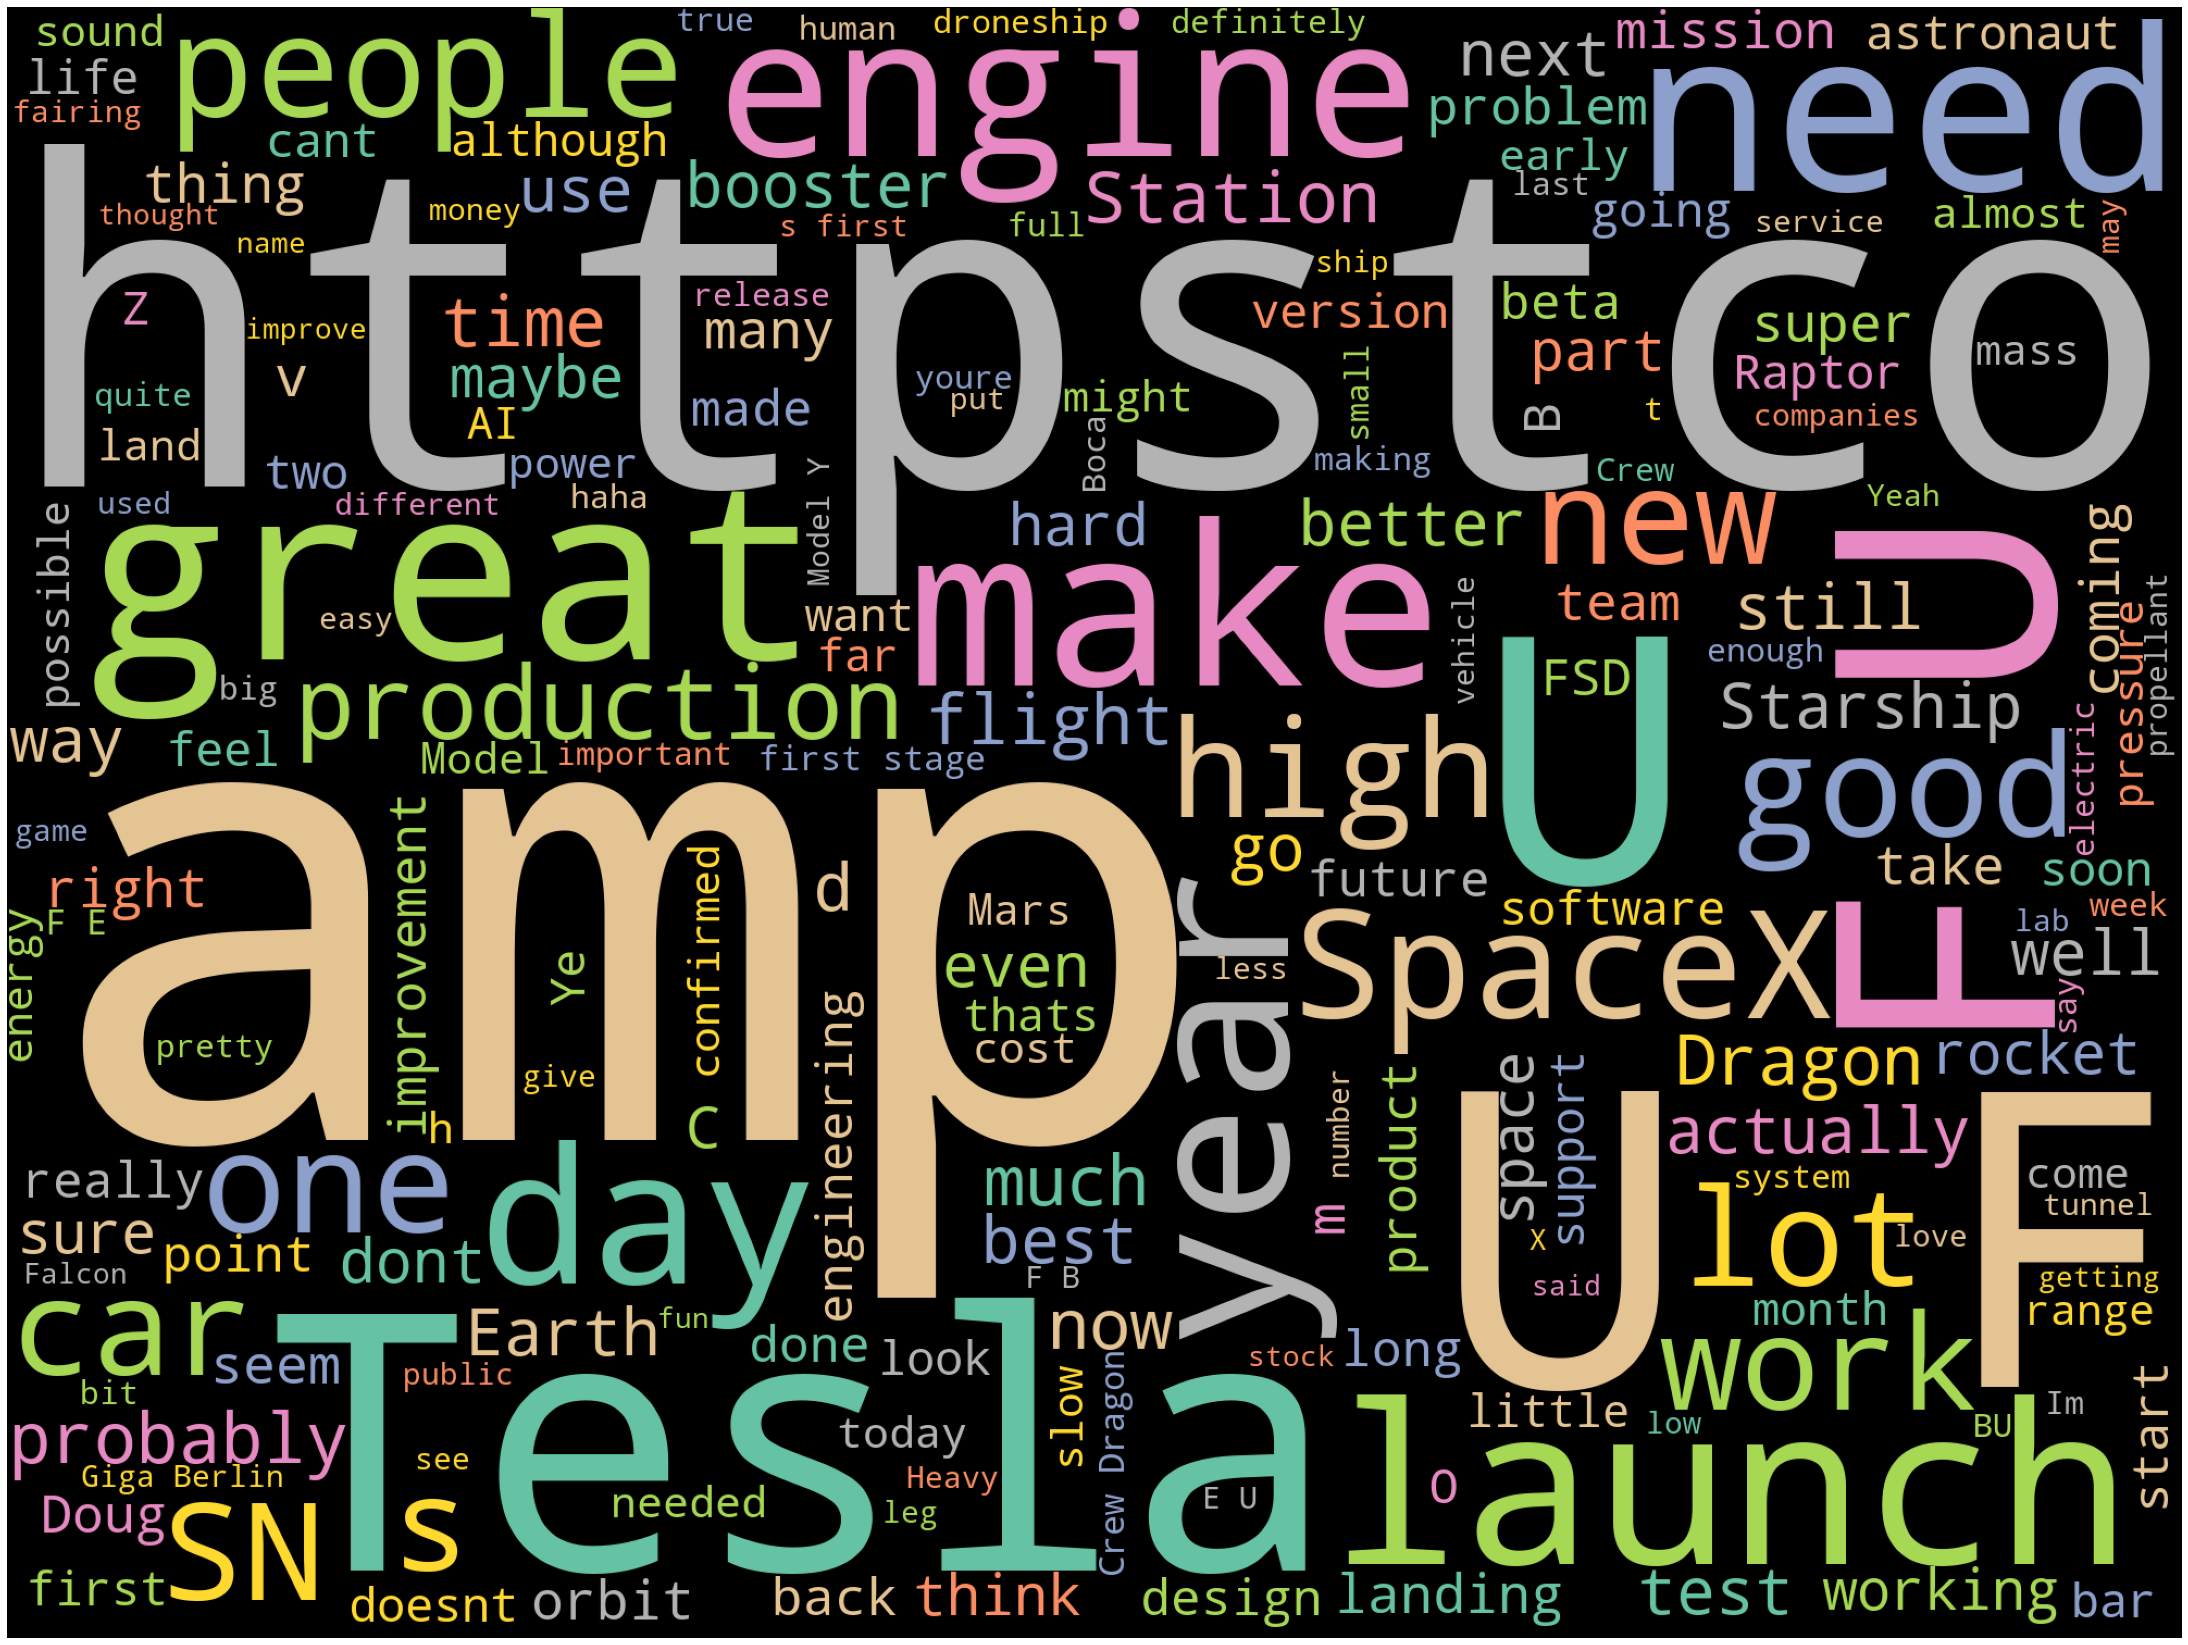

In [153]:
# Generate wordcloud
stopwords = STOPWORDS
stopwords.add('will')
wordcloud = WordCloud(width = 2000, height = 1500,background_color='black',max_words=200,colormap='Set2',stopwords=stopwords).generate(text)
plot_cloud(wordcloud)